In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("C:/Users/vedan/OneDrive/Documents/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4917,6040-CGACY,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.60,299.4,No
4143,4822-YCXMX,Male,0,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.80,2043.45,Yes
812,8098-TDCBU,Female,0,Yes,No,42,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,25.25,1108.2,No
599,0374-FIUCA,Male,0,Yes,No,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.40,1414.45,No
3436,0428-AXXLJ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.50,516.3,No


In [7]:
#drop useless data
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#convert total charges to float
pd.to_numeric(df.TotalCharges, errors='coerce')     #ignores errors such as space, na

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
#rows with null values can be dropped
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)    

C:\Users\vedan\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


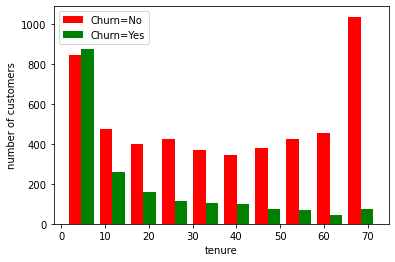

In [12]:
#tenure vs churn histogram
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("number of customers")

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red', 'green'], label=['Churn=No', 'Churn=Yes'])
plt.legend()

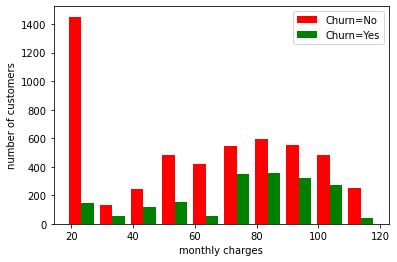

In [13]:
#monthlycharge vs churn histogram
monthlycharge_churn_no = df1[df1.Churn=='No'].MonthlyCharges
monthlycharge_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("monthly charges")
plt.ylabel("number of customers")

plt.hist([monthlycharge_churn_no, monthlycharge_churn_yes], color=['red', 'green'], label=['Churn=No', 'Churn=Yes'])
plt.legend()

In [14]:
#to find weird values
def print_unique_col_cales(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df1[column].unique()}')
            
print_unique_col_cales(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
#No internet service is similar to No
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

C:\Users\vedan\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [16]:
print_unique_col_cales(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
#replace yes/no with 1/0 
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace = True)

In [20]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [21]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [22]:
#one hot encoding 
df2 = pd.get_dummies(data = df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6671,1,0,1,0,59,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3779,0,1,1,1,66,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
5560,0,0,1,0,61,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
#scaling data 
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4375,0,0,0,0,0.915493,1,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0
1865,0,1,0,0,0.661972,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


# ML

In [26]:
#splitting data into train and test
X=df2.drop('Churn', axis='columns')
y=df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

len(X_train.columns)

26

In [27]:
X_train.shape

(5625, 26)

In [28]:
X_test.shape

(1407, 26)

In [30]:
model = keras.Sequential([
                                                                               #26 neurons in input layer, one for each column
    keras.layers.Dense(20, input_shape = (26,), activation='relu'),            #1st hidden layer, 20 o/p, 26 i/p
    #keras.layers.Dense(15, activation='relu'),                                #2nd hidden layer, 15 o/p, i/p specified automatically
    keras.layers.Dense(1, activation='sigmoid')                                #output layer
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 848us/step - loss: 0.5699 - accuracy: 0.6846
Epoch 2/100
176/176 [==============================] - 0s 918us/step - loss: 0.4426 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 873us/step - loss: 0.4275 - accuracy: 0.7957
Epoch 4/100
176/176 [==============================] - 0s 809us/step - loss: 0.4137 - accuracy: 0.8022
Epoch 5/100
176/176 [==============================] - 0s 857us/step - loss: 0.4185 - accuracy: 0.7968
Epoch 6/100
176/176 [==============================] - 0s 821us/step - loss: 0.3944 - accuracy: 0.8159
Epoch 7/100
176/176 [==============================] - 0s 789us/step - loss: 0.4181 - accuracy: 0.8033
Epoch 8/100
176/176 [==============================] - 0s 961us/step - loss: 0.4042 - accuracy: 0.8125
Epoch 9/100
176/176 [==============================] - 0s 853us/step - loss: 0.4015 - accuracy: 0.8130
Epoch 10/100
176/176 [==============================] - 0s 940us/step - l

In [31]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 742us/step - loss: 0.4562 - accuracy: 0.7740


[0.4562114477157593, 0.7739872336387634]

In [32]:
y_predict = model.predict(X_test)
y_predict[:5]

array([[0.24957937],
       [0.44446576],
       [0.00979674],
       [0.79021484],
       [0.5045199 ]], dtype=float32)

In [33]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [34]:
#converting y_predict to 0 and 1 values and to 1 dimension
y_predict1 = []
for element in y_predict:
    if element > 0.5:
        y_predict1.append(1)
    else:
        y_predict1.append(0)

In [35]:
y_predict1[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [36]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [37]:
#clasification report and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.49      0.56       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(0.5, 42.0, 'Truth')

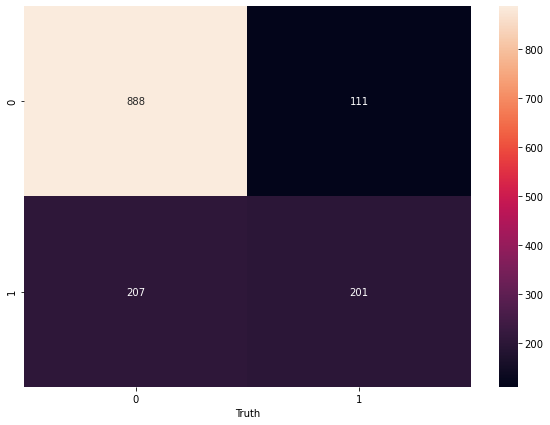

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict1)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Truth')

# Mitigating Skewdness of Data

# Method 1: Undersampling

In [93]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]       
df_class_1 = df2[df2['Churn'] == 1]

In [96]:
count_class_0, count_class_1

(5163, 1869)

In [94]:
df_class_0.shape     #majority class

(5163, 27)

In [95]:
df_class_1.shape     #minority class

(1869, 27)

In [98]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [99]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)  #stratify>makes sure you have balanced samples


In [100]:
y_train.value_countsnts()  #equal samples from both classes

1    1495
0    1495
Name: Churn, dtype: int64

In [39]:
#function for above model
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [103]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 864us/step - loss: 0.6841 - accuracy: 0.5459
Epoch 2/100
94/94 [==============================] - 0s 882us/step - loss: 0.5509 - accuracy: 0.7266
Epoch 3/100
94/94 [==============================] - 0s 890us/step - loss: 0.4986 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7478
Epoch 5/100
94/94 [==============================] - 0s 992us/step - loss: 0.4853 - accuracy: 0.7687
Epoch 6/100
94/94 [==============================] - 0s 974us/step - loss: 0.4824 - accuracy: 0.7717
Epoch 7/100
94/94 [==============================] - 0s 858us/step - loss: 0.4847 - accuracy: 0.7687
Epoch 8/100
94/94 [==============================] - 0s 847us/step - loss: 0.4832 - accuracy: 0.7764
Epoch 9/100
94/94 [==============================] - 0s 882us/step - loss: 0.4661 - accuracy: 0.7797
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 

In [ ]:
#higher precision than initial case

# Method2: Oversampling

In [104]:
count_class_0, count_class_1

(5163, 1869)

In [105]:
df_class_1.sample(2000, replace=True).shape  #1869 became 2000

(2000, 27)

In [106]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [107]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [108]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [109]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [110]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 882us/step - loss: 0.6010 - accuracy: 0.6996
Epoch 2/100
259/259 [==============================] - 0s 947us/step - loss: 0.4851 - accuracy: 0.7649
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.7697
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7785
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7659
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7694
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7800
Epoch 8/100
259/259 [==============================] - 0s 961us/step - loss: 0.4689 - accuracy: 0.7738
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7736
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4577 - 

In [ ]:
#improved f1score but not much

# Method 3: SMOTE

In [40]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [41]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [48]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [49]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5985 - accuracy: 0.6739
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7727
Epoch 3/100
259/259 [==============================] - 0s 854us/step - loss: 0.4698 - accuracy: 0.7718
Epoch 4/100
259/259 [==============================] - 0s 920us/step - loss: 0.4667 - accuracy: 0.7740
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7916
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.7921
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7898
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.7978
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7864
Epoch 10/100
259/259 [==============================] - 0s 907us/step - loss: 0.4212 - 

In [ ]:
#Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80

# Method4: Use of Ensemble with undersampling

In [51]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [52]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
y_train.value_counts()    #imbalance... 4130/3 = 1376.67 aprox 1495

0    4130
1    1495
Name: Churn, dtype: int64

In [55]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [56]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [57]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [58]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [59]:

X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 965us/step - loss: 0.6521 - accuracy: 0.5832
Epoch 2/100
94/94 [==============================] - 0s 926us/step - loss: 0.5249 - accuracy: 0.7682
Epoch 3/100
94/94 [==============================] - 0s 826us/step - loss: 0.4946 - accuracy: 0.7629
Epoch 4/100
94/94 [==============================] - 0s 965us/step - loss: 0.4949 - accuracy: 0.7582
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7536
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7845
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7688
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.7760
Epoch 9/100
94/94 [==============================] - 0s 815us/step - loss: 0.4630 - accuracy: 0.7802
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.7829

94/94 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8171
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8130
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8120
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8099
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8188
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8110
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8208
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8182
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8218
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8244
Epoch 92/100


In [60]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 928us/step - loss: 0.6327 - accuracy: 0.6742
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7455
Epoch 3/100
94/94 [==============================] - 0s 879us/step - loss: 0.4991 - accuracy: 0.7511
Epoch 4/100
94/94 [==============================] - 0s 978us/step - loss: 0.4906 - accuracy: 0.7581
Epoch 5/100
94/94 [==============================] - 0s 944us/step - loss: 0.4804 - accuracy: 0.7560
Epoch 6/100
94/94 [==============================] - ETA: 0s - loss: 0.4754 - accuracy: 0.77 - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7698
Epoch 7/100
94/94 [==============================] - 0s 987us/step - loss: 0.4982 - accuracy: 0.7530
Epoch 8/100
94/94 [==============================] - 0s 912us/step - loss: 0.4635 - accuracy: 0.7757
Epoch 9/100
94/94 [==============================] - 0s 944us/step - loss: 0.4771 - accuracy: 0.7593
Epoch 10/100
94/94 [==============================] -

In [61]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 925us/step - loss: 0.6512 - accuracy: 0.6174
Epoch 2/100
83/83 [==============================] - 0s 965us/step - loss: 0.5173 - accuracy: 0.7537
Epoch 3/100
83/83 [==============================] - 0s 985us/step - loss: 0.4879 - accuracy: 0.7711
Epoch 4/100
83/83 [==============================] - 0s 960us/step - loss: 0.4871 - accuracy: 0.7747
Epoch 5/100
83/83 [==============================] - 0s 997us/step - loss: 0.4712 - accuracy: 0.7923
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7841
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7822
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7969
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7901
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7901

In [62]:
len(y_pred1)

1407

In [63]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [64]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407



In [ ]:
#f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes